## Autocorrelation Plot

Example of Autocorrelation plot taken from the Wikipedia [article](https://en.wikipedia.org/wiki/Correlogram).

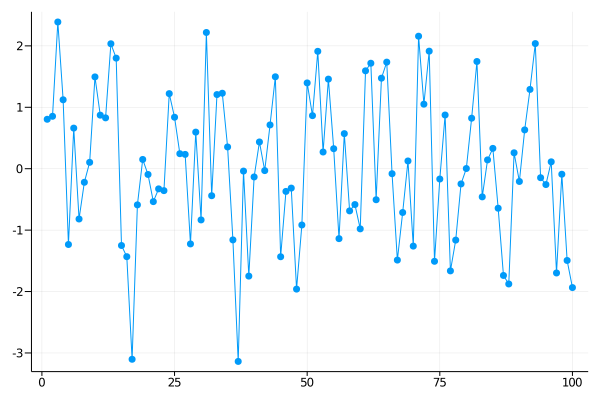

In [63]:
using Plots
X = randn(100) + sin.(2π*x/10 for x in 1:100)
plot(X, tick_direction=:out, markershape=:circle, markerstrokewidth=0, leg=:none)

In [122]:
using StatsBase, Distributions
@userplot ACPlot

@recipe function f(h::ACPlot)
    X, = h.args

    N=length(X)
    μ=mean(X)
    
    c(h)=sum((X[i]-μ)*(X[i+h]-μ)/N for i in 1:N-h)
    ch = [c(h) for h in 0:N-1]/c(0)
    
    B=quantile(Normal(), 0.95)/√N
    
    @series begin
        primary := false
        seriestype := :path
        [0,N], [B,B]
    end
    
    @series begin
        primary := false
        seriestype := :path
        [0,N], [-B,-B]
    end
    
    legend --> :none
    linewidth --> 0
    seriestype := :bar
    tick_direction --> :out

    #autocor(X, collect(0:N-1))
    ch
end

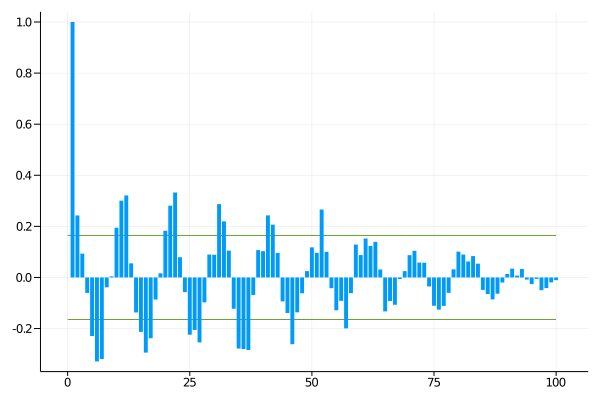

In [123]:
acplot(X)

## Global Temperature Changes

In [124]:
using CSV
temp = CSV.read("loti.csv")[:,13];

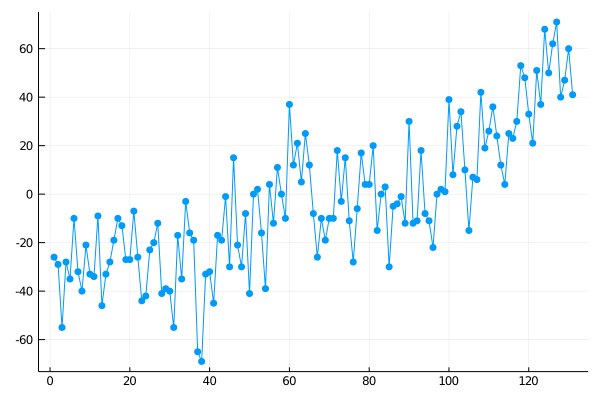

In [125]:
plot(temp, leg=:none, markershape=:circle, markerstrokewidth=0)

This clearly has a (maybe linear) trend. The autocorrelation goes a bit weird because if this.

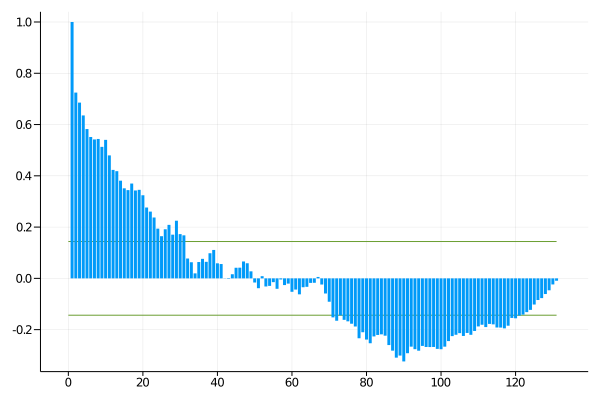

In [174]:
acplot(temp)

So we try fitting a linear trend to it and remove it from the data.

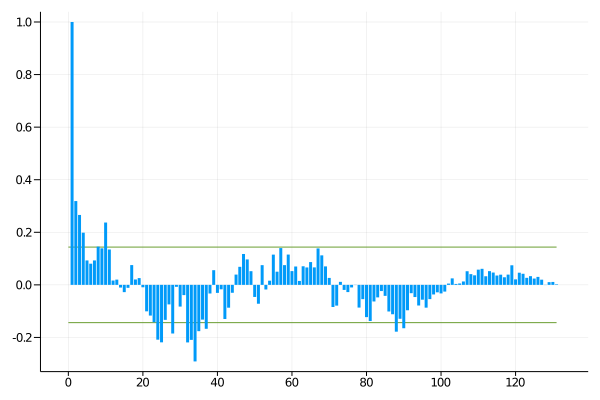

In [177]:
using Polynomials
lm = Polynomials.fit(1:length(temp), Float64.(temp), 1)
detrend = [temp[x] - lm(x) for x in 1:length(temp)]
acplot(detrend)

The autocorrelation is much better now.
We can also try removing the trend from the data using the finite differencing method.

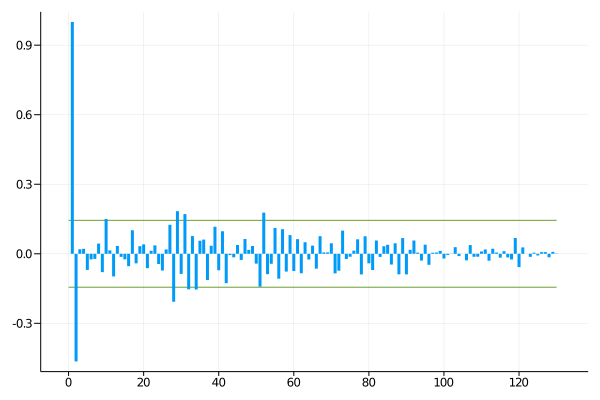

In [182]:
acplot(diff(temp))

This gives us a different but also reasonable autocorrelation.

# Parcial Autocorrelation Plot

Why is this useful to see?

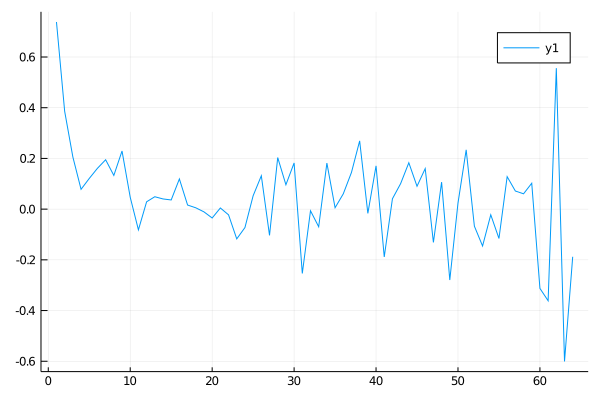

In [96]:
plot(pacf(temp, collect(1:length(temp)>>1-1)))

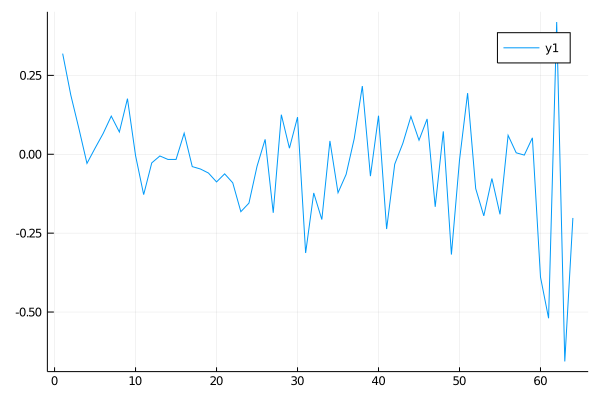

In [173]:
plot(pacf(detrend, collect(1:length(detrend)>>1-1)))

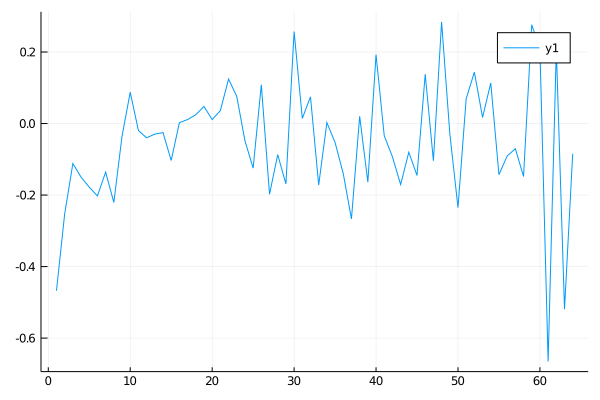

In [183]:
plot(pacf(diff(temp), collect(1:length(temp)>>1-1)))